In [2]:
!pip install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 7.5 MB/s eta 0:00:00


In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearnex import patch_sklearn
# Patch scikit-learn to use Intel's oneAPI optimizations
patch_sklearn()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [28]:
df=pd.read_csv('DataCoSupplyChainDataset.csv',encoding = 'latin-1')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [29]:
data=df.copy()
FeatureList=['Type', 'Benefit per order', 'Sales per customer',
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country',
           'Customer Id', 'Customer Segment',
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id',
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total',
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']

df1=df[FeatureList]
df1.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [30]:
df_geo=df1.groupby([ 'Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)

df_geo

,Order Country,Order City,Profit of Orders
3260,República Dominicana,Santo Domingo,51111.670019
1492,Estados Unidos,New York City,47889.759868
2152,Honduras,Tegucigalpa,40973.640056
1430,Estados Unidos,Los Angeles,38014.360024
2837,Nicaragua,Managua,34319.950107
...,...,...,...
738,China,Dalian,-1588.609972
3,Afganistán,Kandahar,-1681.830001
3110,Reino Unido,Dudley,-1742.079996
2463,Italia,Cerignola,-2212.530012


In [35]:
data=df1.copy()
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x
features=data.drop(columns=['SUSPECTED_FRAUD','Order Status' ])
target=data['SUSPECTED_FRAUD']

features.isnull().sum()

,0
Type,0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Name,0
Customer City,0
Customer Country,0
Customer Id,0
Customer Segment,0


In [36]:
features=features.apply(Labelencoder_feature)
features.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,18934,2568,0,0,40,66,1,20649,0,36,7,4,3624,4420,3,331,70,20649,5961,65749,114,426,4,180516,62,140,0,166,2568,18934,15,475,609,114,47,0,78,78,62,0,27149,3
1,3,2272,2559,1,1,40,66,1,19386,0,36,7,4,5522,4419,3,391,69,19386,1147,64486,114,498,5,179253,62,44,0,166,2559,2272,13,841,609,114,47,0,78,78,62,0,2209,3
2,0,2293,2555,3,0,40,452,0,19385,0,5,941,4,9146,232,3,391,69,19385,1146,64485,114,529,6,179252,62,44,0,166,2555,2293,13,841,609,114,47,0,78,78,62,0,1980,3
3,1,13638,2546,0,0,40,285,0,19384,2,5,720,4,8467,663,3,3226,8,19384,1145,64484,114,600,7,179251,62,119,0,166,2546,13638,11,835,609,114,47,0,78,78,62,0,1752,3
4,2,20599,2526,0,0,40,66,1,19383,1,36,7,4,3783,4421,3,3226,8,19383,1144,64483,114,682,8,179250,62,156,0,166,2526,20599,11,835,609,114,47,0,78,78,62,0,1528,3


In [37]:
#deleting features which high-correlated with other features to avoid multicollinarity
data1=pd.concat([features,target],axis=1)
#deleting features which high-correlated with other features to avoid multicollinarity

corr = data1.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data1.columns[columns]
selected_columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity', 'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 'Product Status', 'Shipping Mode', 'SUSPECTED_FRAUD'], dtype='object')

In [38]:
features1=features[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
                    'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment',
                    'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market',
                    'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
                    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity',
                    'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image',
                    'Product Status', 'Shipping Mode']]

from scipy.stats import pearsonr

corre=pd.DataFrame()

for i in features1.columns:
    corre[i]= pearsonr(target, features1[i])
corre

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Region,Order State,Order Zipcode,Product Description,Product Image,Product Status,Shipping Mode
0,0.202094,-0.002586,-0.000807,0.128768,-0.167158,-0.002104,-0.003561,0.006756,0.009375,-0.005935,0.005670,-0.005600,-0.000837,-0.004709,0.005100,-0.000293,-0.005889,-0.004928,0.003002,0.002222,-0.001109,0.002893,0.002271,0.000315,-0.000757,0.009077,-0.006105,0.004666,NaN,-0.000741,NaN,-0.004641
1,0.000000,0.271923,0.731807,0.000000,0.000000,0.371352,0.130283,0.004098,0.000068,0.011686,0.016001,0.017337,0.722187,0.045427,0.030231,0.900798,0.012344,0.036290,0.202217,0.345187,0.637360,0.219059,0.334515,0.893383,0.747677,0.000115,0.009491,0.047437,NaN,0.752963,NaN,0.048639


In [39]:
corre1=corre.T
coore2= corre1.iloc[:,0].sort_values(ascending=False)

coore2

,0
Type,0.202094
Delivery Status,0.128768
Customer Id,0.009375
Order Region,0.009077
Customer Country,0.006756
Customer State,0.005670
Longitude,0.005100
Order Zipcode,0.004666
order date (DateOrders),0.003002
Order Item Discount,0.002893


In [40]:
new_features= ['Type', 'Delivery Status', 'Order Region', 'Customer Country', 'Customer State', 'Order Zipcode',
               'Shipping Mode', 'Order Country', 'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State',
               'Late_delivery_risk', 'Product Description', 'Product Status']

In [41]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [43]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Type,7686.615869,0.000
18,Order Customer Id,15.868141,0.000
31,Order Region,14.875551,0.000
4,Late_delivery_risk,5188.953532,0.000
8,Customer Id,15.868141,0.000
3,Delivery Status,3043.655705,0.000
7,Customer Country,8.239934,0.004
32,Order State,6.728124,0.009
9,Customer Segment,6.358072,0.012
16,Order City,6.260967,0.012


In [44]:
f_reg_list=f_reg_results.Variable.values
f_reg_list
#final features list is both f_ref_list and new_feature
final_features=features[['Type', 'Order Region', 'Delivery Status', 'Late_delivery_risk',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Order Country', 'Order Zipcode', 'shipping date (DateOrders)',
       'Shipping Mode']]

<Axes: >

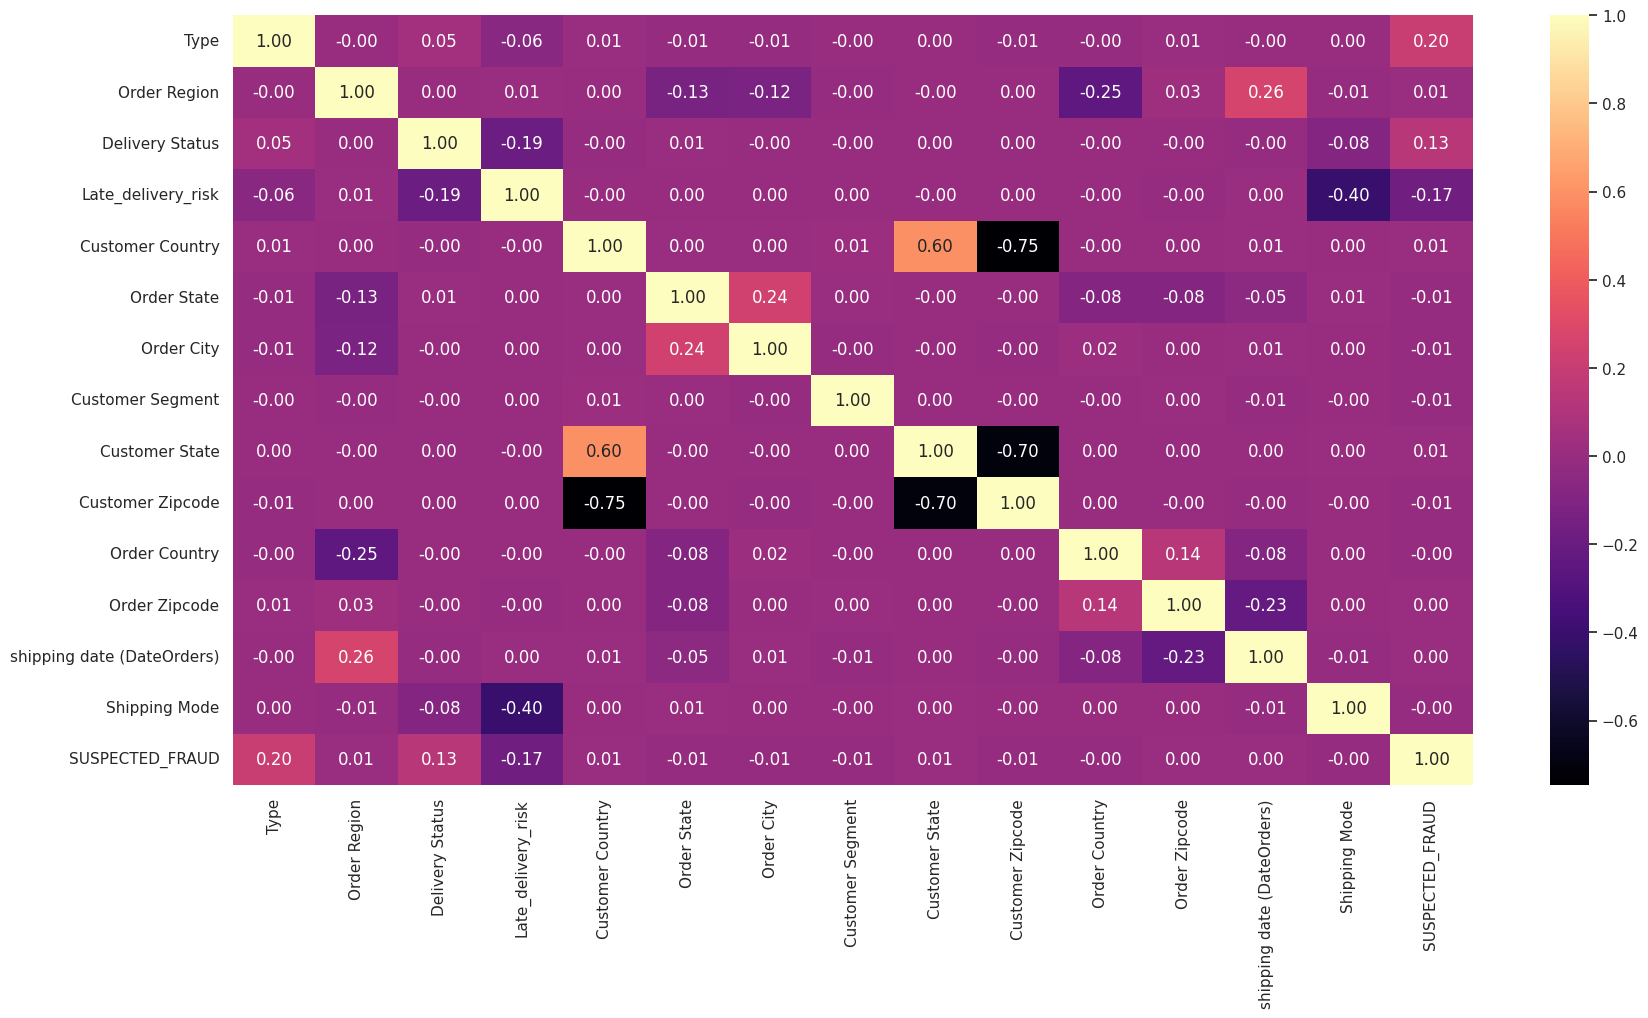

In [45]:
final_data=pd.concat([final_features, target], axis=1)
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [47]:
final_features2=final_features.drop(columns=['Customer State', 'Customer Zipcode'])
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size = 0.2, random_state = 42)

lgr_pipline  = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression())])
rfc_pipline = Pipeline([("scaler", StandardScaler()), ("RandomForestClassifier", RandomForestClassifier())])
knn_pipline = Pipeline([("scaler", StandardScaler()), ("KNeighborsClassifier", KNeighborsClassifier())])
gnb_pipline = Pipeline([("scaler", StandardScaler()), ("GaussianNB", GaussianNB())])
sgd_pipline = Pipeline([("scaler", StandardScaler()), ("SGDClassifier", SGDClassifier())])
dt_pipline = Pipeline([("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier())])


pip_dict1 ={0:'Logistic Regression' , 1:'RandomForestClassifier' , 2: 'KNeighborsClassifier' ,
            3: 'GaussianNB', 4: 'SGDClassifier', 5: 'DecisionTreeClassifier' }

piplines1=[lgr_pipline, rfc_pipline , knn_pipline, gnb_pipline  , sgd_pipline , dt_pipline ]
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features2, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())



grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
]


pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])
random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 3, verbose = 5, random_state = 42)

best_model = random_search.fit(X_train, y_train)
best_model = random_search.fit(X_train, y_train)
best_model.best_params_

pipeline_rf = Pipeline([('scaler', StandardScaler()),
                           ('Random Forest Calssifer', RandomForestClassifier(criterion='entropy', max_features='sqrt',
                        n_estimators=150))])

model = pipeline_rf.fit(X_train, y_train)

rf_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model.predict(X_train)})
rf_train_predict.head()

rf_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model.predict(X_test)})
rf_test_predict.head()
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rf_test_predict.actual, rf_test_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rf_test_predict.actual, rf_test_predict.predicted))

Logistic Regression :  0.9764013821635901
RandomForestClassifier :  0.9918124869213963
KNeighborsClassifier :  0.9812706763463586
GaussianNB :  0.9795478562150082
SGDClassifier :  0.9774982135396149
DecisionTreeClassifier :  0.9930976587827951
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy Score for test dataset :  0.9967039663195214
ROC-AUC Score for validation dataset :  0.9627209928618864
